<a href="https://colab.research.google.com/github/Sanvika25/Customer-credit-card-churn-predictive-analysis/blob/main/data%20analytics%20using%20SMOTE%20sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Customer Churn Prediction: Using Data Analytics and Machine Learning Models**

It is no secret that customer retention is a top priority for many companies;acquiring new customers can be several times more expensive than retaining existing ones. Furthermore, gaining an understanding of the reasons customers churn and estimating the risk associated with individual customers are both powerful components of designing a data-driven retention strategy. A churn model can be the tool that brings these elements together and provides insights and outputs that drive decision making across an organization.

**What is Churn Rate?**

Churn rate (sometimes called attrition rate), in its broadest sense, is a measure of the number of individuals or items moving out of a collective group over a specific period. It is one of two primary factors that determine the steady-state level of customers a business will support.
Building a predictive churn model helps you make proactive changes to your retention efforts that drive down churn rates. Understanding how churn impacts your current revenue goals and making predictions about how to manage those issues in the future also helps you stem the flow of churned customers. If you don’t take action against your churn now, any company growth you experience simply won’t be sustainable.

Comprehensive customer profiles help you see what types of customers are canceling their accounts.

**Step 1: Importing the Data and Libraries**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [ ]:
import os
for dirname, _, filenames in os.walk('/BankChurners/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import os
for dirname, _, filenames in os.walk('/BankChurners/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
data = pd.read_csv('BankChurners.csv')

In [ ]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [ ]:
data.head(2)

Clientnum          Attrition  Age Gender  Dependent_count    Education  \
0  768805383  Existing Customer   45      M                3  High School   
1  818770008  Existing Customer   49      F                5     Graduate   

  Marital_Status          Income Card_Category  Months_on_book  ...  \
0        Married     $60K - $80K          Blue              39  ...   
1         Single  Less than $40K          Blue              44  ...   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0             1144              42                1.625   
1             1291              33                3.714   

   Avg_Utilization_Ratio  Naive_Bayes_1  Naive_Bayes_2  
0                  0.061       0.000093        0.99991  
1                  0.105       0.000057        0.99994  

[2 rows x 23 columns]

In [ ]:
old_names = data.columns
new_names = ['Clientnum', 'Attrition', 'Age', 'Gender', 'Dependent_count', 'Education', 'Marital_Status', 'Income',
             'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive', 'Contacts_Count',
             'Credit_Limit', 'Total_Revolving_Bal','Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
             'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio','Naive_Bayes_1','Naive_Bayes_2']
data.rename(columns=dict(zip(old_names, new_names)), inplace=True)

In [ ]:
data.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

**Step 2. Exploratory data analysis**

After preprocessing the data, it is analyzed through visual exploration to gather insights about the model that can be applied to the data, understand the diversity in the data and the range of every field. We use a bar chart, box plot, distribution graph, etc. to explore each feature varies and its relation with other features including the target feature.

Import basic Librairies.

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data.head(2)

Clientnum          Attrition  Age Gender  Dependent_count    Education  \
0  768805383  Existing Customer   45      M                3  High School   
1  818770008  Existing Customer   49      F                5     Graduate   

  Marital_Status          Income Card_Category  Months_on_book  ...  \
0        Married     $60K - $80K          Blue              39  ...   
1         Single  Less than $40K          Blue              44  ...   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0             1144              42                1.625   
1             1291              33                3.714   

   Avg_Utilization_Ratio  Naive_Bayes_1  Naive_Bayes_2  
0                  0.061       0.000093        0.99991  
1                  0.105       0.000057        0.99994  

[2 rows x 23 columns]

In [ ]:
#Check to confirm if the Database is IMBALANCED?
#Churn vs. normal
counts = data.Attrition.value_counts()
normal = counts[0]
Churn = counts[1]
perc_normal = (normal/(normal+Churn))*100
perc_Churn = (Churn/(normal+Churn))*100
print('There were {} non-Churn ({:.3f}%) and {} Churn ({:.3f}%).'.format(normal, perc_normal, Churn, perc_Churn))

There were 8500 non-Churn (83.934%) and 1627 Churn (16.066%).


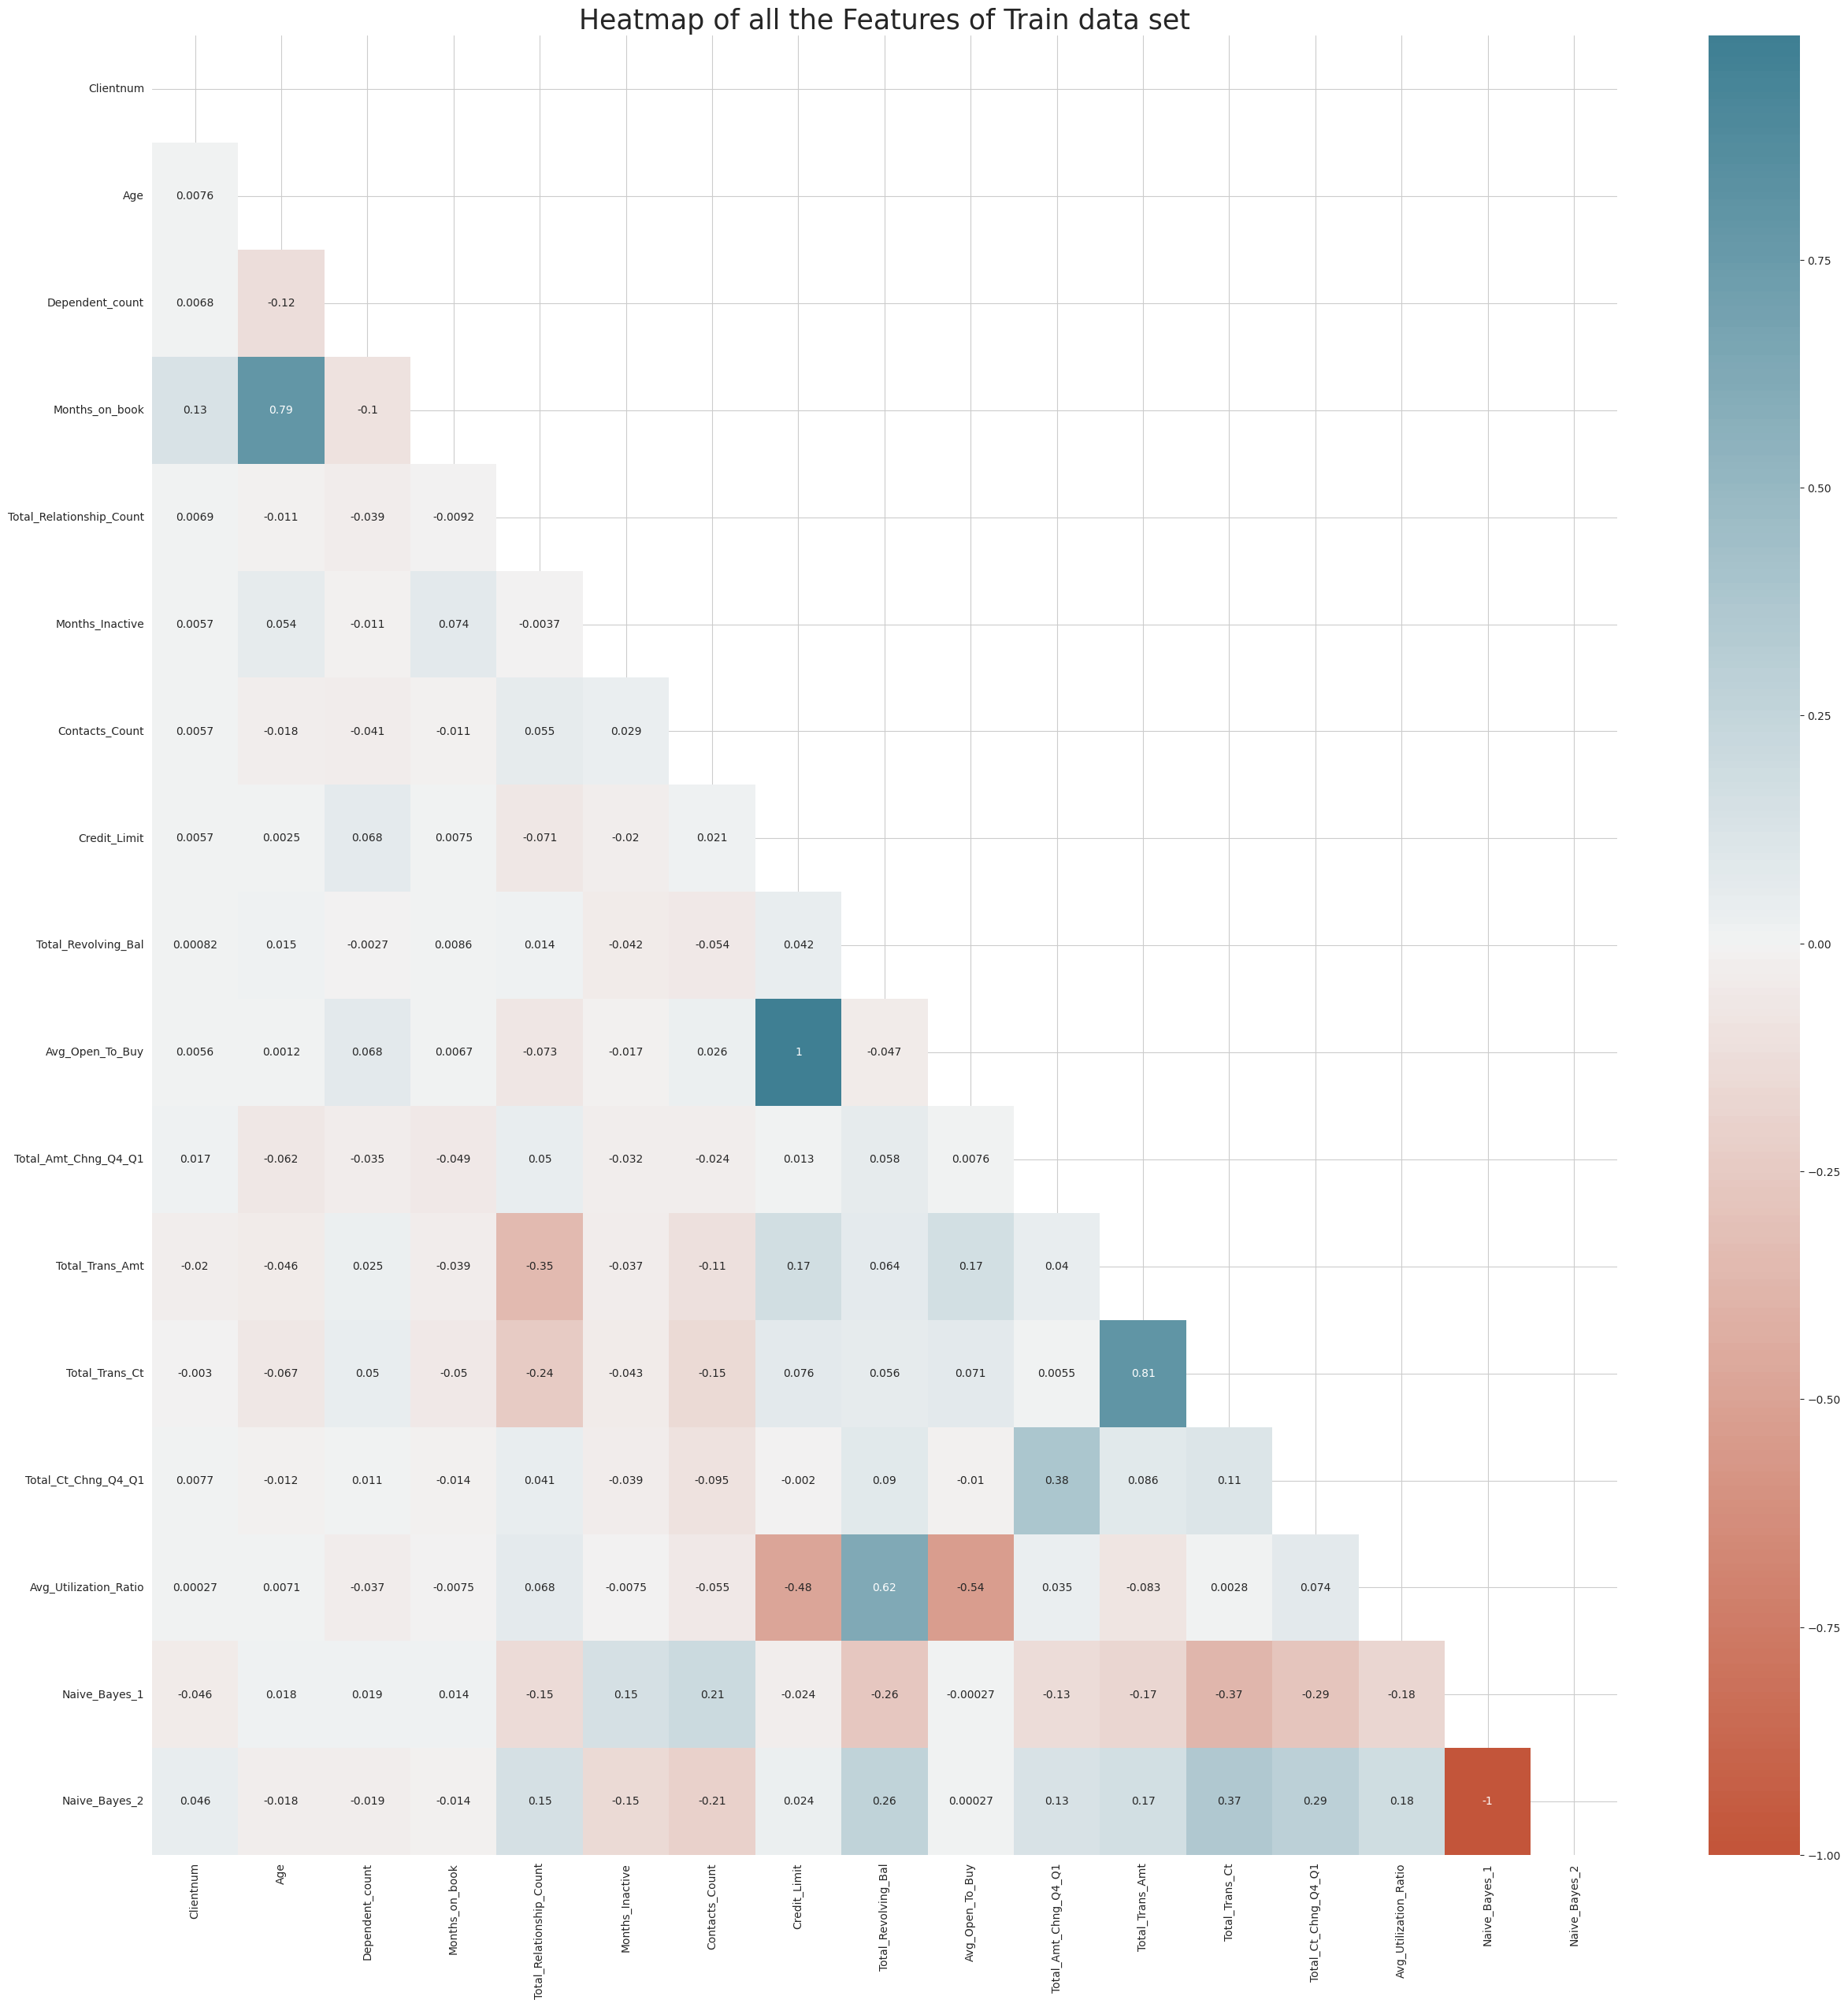

In [ ]:
#illustrations
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (30,30))
## Plotting heatmap. Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data.corr(), cmap=sns.diverging_palette(20, 220, n=200), annot=True, mask=mask, center = 0, );
plt.title("Heatmap of all the Features of Train data set", fontsize = 25);

In [ ]:
data.columns

Index(['Clientnum', 'Attrition', 'Age', 'Gender', 'Dependent_count',
       'Education', 'Marital_Status', 'Income', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive',
       'Contacts_Count', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_1', 'Naive_Bayes_2'],
      dtype='object')

<Axes: xlabel='Attrition', ylabel='Contacts_Count'>

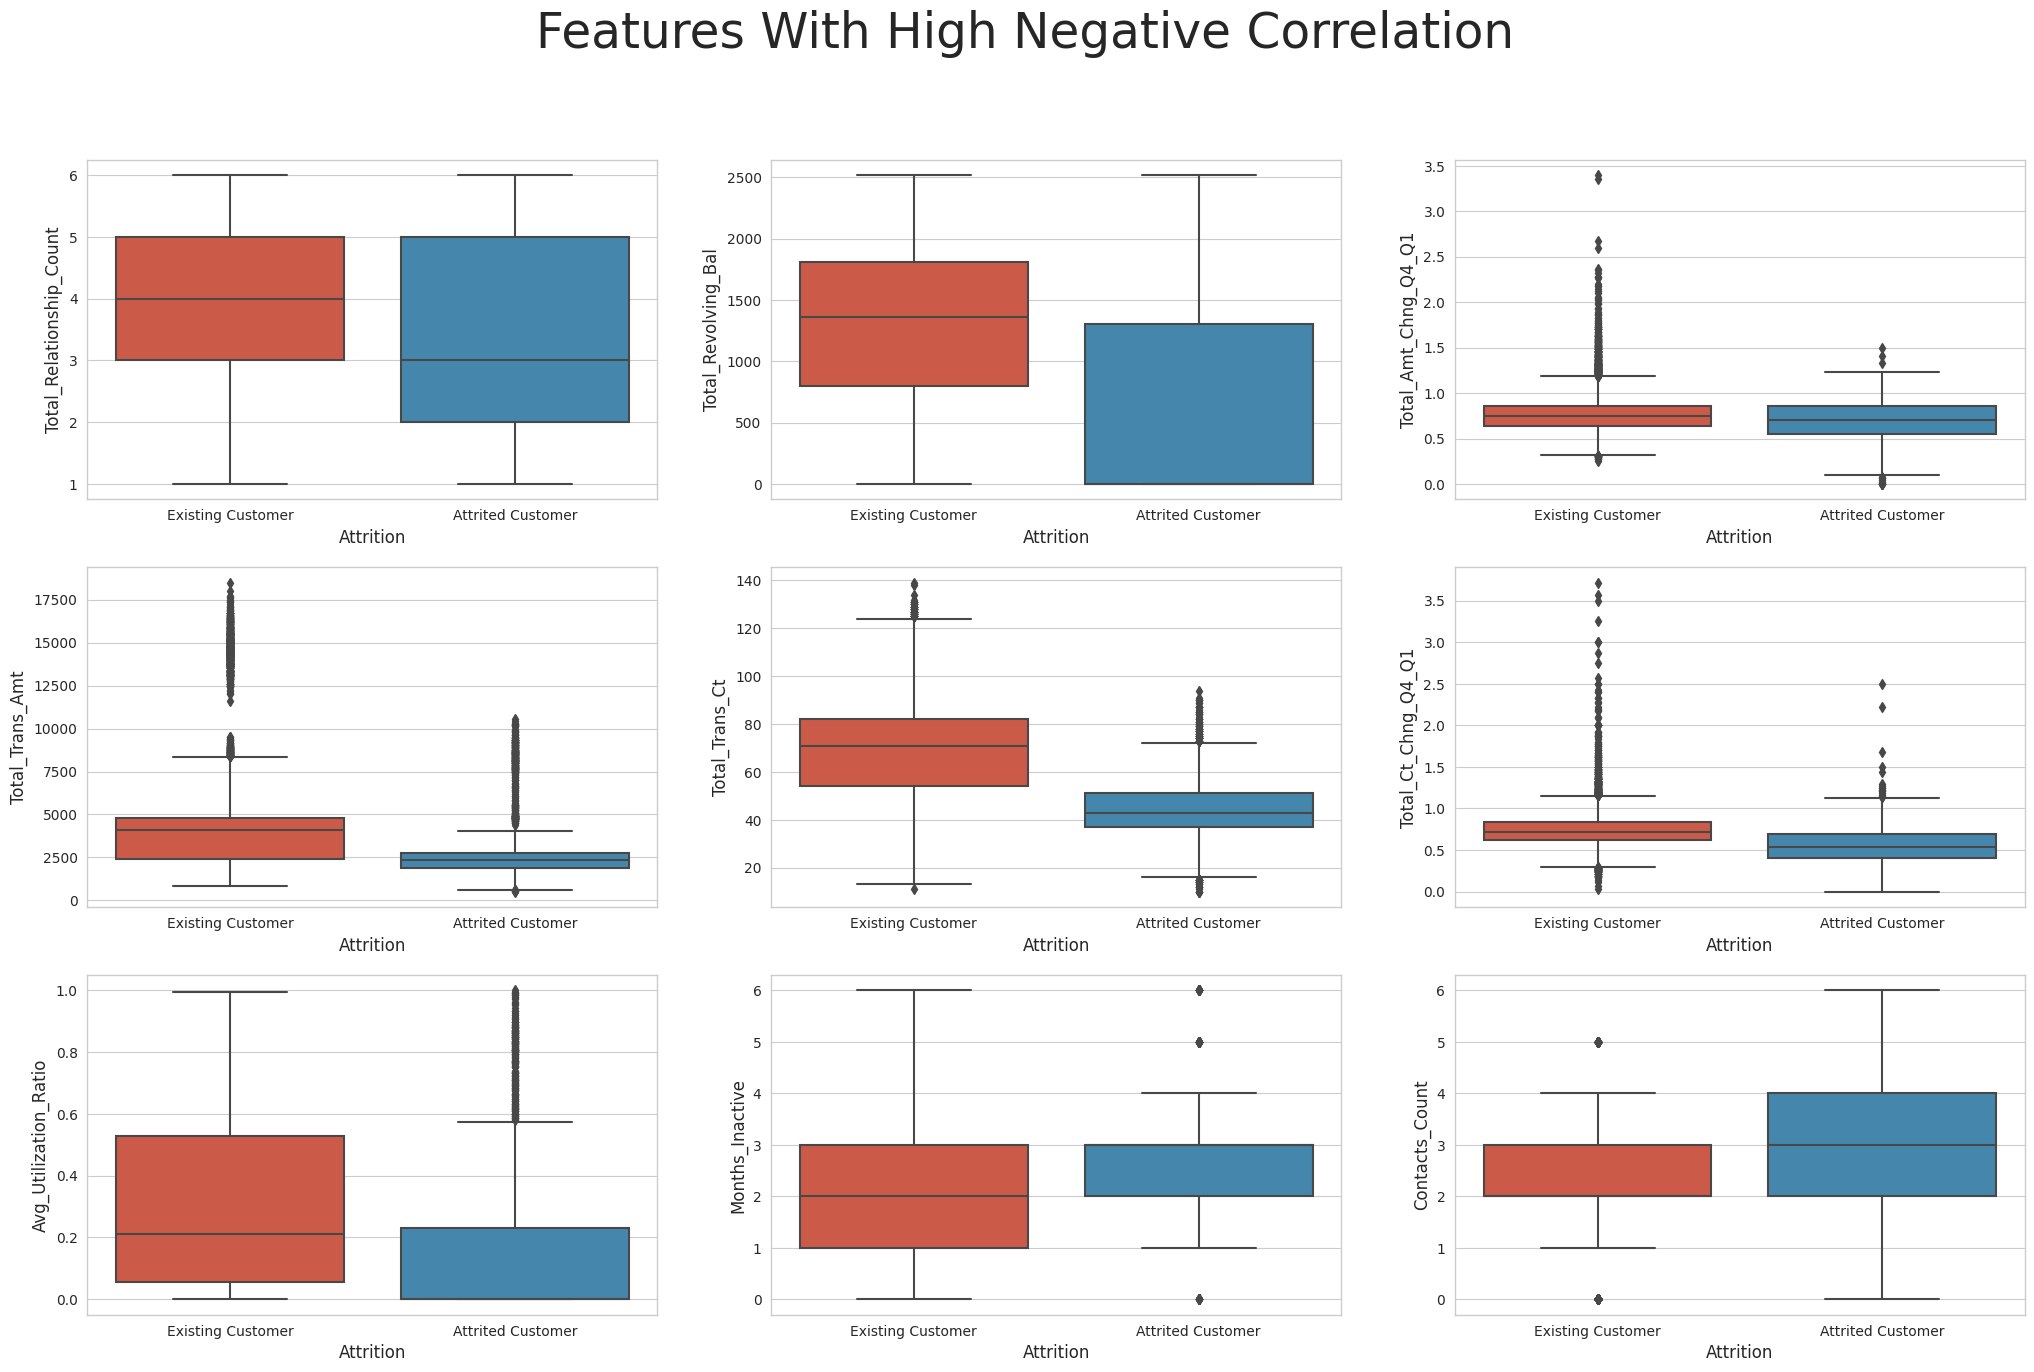

In [ ]:
#visualizing the features with positive and negative correlation
f, axes = plt.subplots(nrows=3, ncols=3, figsize=(25,15))

f.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="Attrition", y="Total_Relationship_Count", data=data, ax=axes[0,0])
sns.boxplot(x="Attrition", y="Total_Revolving_Bal", data=data, ax=axes[0,1])
sns.boxplot(x="Attrition", y="Total_Amt_Chng_Q4_Q1", data=data, ax=axes[0,2])
sns.boxplot(x="Attrition", y="Total_Trans_Amt", data=data, ax=axes[1,0])
sns.boxplot(x="Attrition", y="Total_Trans_Ct", data=data, ax=axes[1,1])
sns.boxplot(x="Attrition", y="Total_Ct_Chng_Q4_Q1", data=data, ax=axes[1,2])
sns.boxplot(x="Attrition", y="Avg_Utilization_Ratio", data=data, ax=axes[2,0])
sns.boxplot(x="Attrition", y="Months_Inactive", data=data, ax=axes[2,1])
sns.boxplot(x="Attrition", y="Contacts_Count", data=data, ax=axes[2,2])

In [ ]:
yprop = 'Age'
xprop = 'Months_Inactive'
h= 'Attrition'
px.scatter(data, x=xprop, y=yprop, color=h, marginal_y="violin", marginal_x="box", trendline="ols", template="simple_white")

In [ ]:
yprop = 'Months_on_book'
xprop = 'Dependent_count'
h= 'Attrition'
px.scatter(data, x=xprop, y=yprop, color=h, marginal_y="violin", marginal_x="box", trendline="ols", template="simple_white")

In [ ]:
fig = px.box(data, x='Gender',y='Avg_Utilization_Ratio', color='Attrition', notched=True)
fig.update_layout(legend=dict(orientation="h",yanchor="bottom",y=1.02,xanchor="right",x=1))
fig.show()

In [ ]:
yprop = 'Total_Amt_Chng_Q4_Q1'
xprop = 'Total_Trans_Amt'
h= 'Attrition'
px.scatter(data, x=xprop, y=yprop, color=h, marginal_y="violin", marginal_x="box", trendline="ols", template="simple_white")

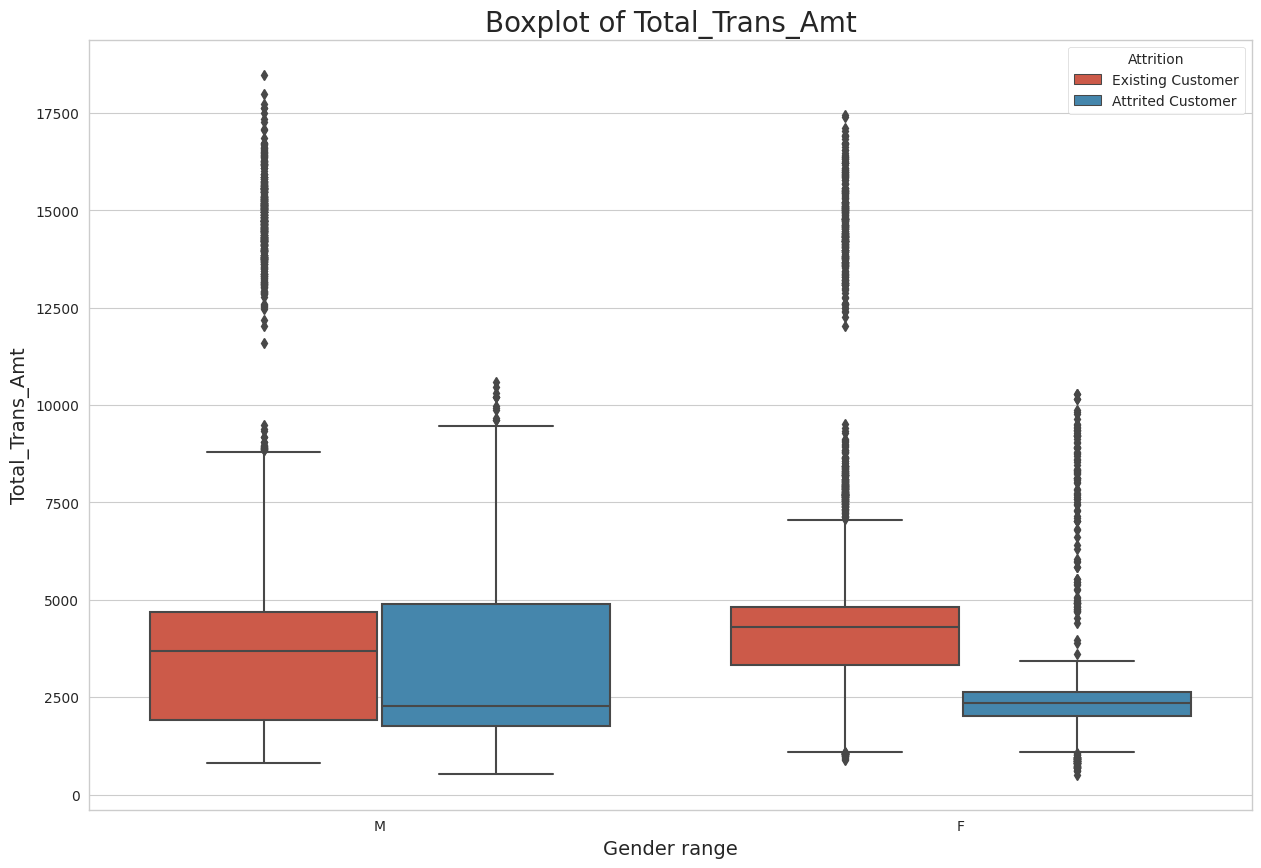

In [ ]:
plt.figure(figsize=(15,10))
xprop = 'Gender'
yprop = 'Total_Trans_Amt'
sns.boxplot(data=data, x=xprop, y=yprop, hue='Attrition')
plt.xlabel('{} range'.format(xprop), size=14)
plt.ylabel('{}'.format(yprop), size=14)
plt.title('Boxplot of {}'.format(yprop), size=20)
plt.show()

In [ ]:
prop = 'Avg_Utilization_Ratio'
xprop = 'Total_Trans_Ct'
h= 'Attrition'
px.scatter(data, x=xprop, y=yprop, color=h, marginal_y="violin", marginal_x="box", trendline="ols", template="simple_white")

In [ ]:
yprop = 'Total_Revolving_Bal'
xprop = 'Credit_Limit'
h= 'Attrition'
px.scatter(data, x=xprop, y=yprop, color=h, marginal_y="violin", marginal_x="box", trendline="ols", template="simple_white")

Overally, it's NOT EASY to conclude something from these illustrations, OR, the analysis is not deep ENOUGH !

But YES, features have not strong correlation with each other.

**Step 3: Converting Categorical Columns to Numeric Columns**

Machine learning algorithms work best with numerical data. However, in our dataset, we have some categorical columns. These columns contain data in textual format; we need to convert them to numeric columns.

In [ ]:
#Firsly, remove the Id column and rearrange the columns.
data = pd.DataFrame(data, columns = ['Age', 'Gender', 'Dependent_count','Education', 'Marital_Status',
                                     'Income', 'Card_Category','Months_on_book', 'Total_Relationship_Count',
                                     'Months_Inactive','Contacts_Count', 'Credit_Limit', 'Total_Revolving_Bal',
                                     'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
                                     'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
                                     'Naive_Bayes_1', 'Naive_Bayes_2','Attrition'])

In [ ]:
#copying the Data and Str Map the NON OBJECT columns
import copy
df_train=copy.deepcopy(data)
cols=np.array(data.columns[data.dtypes != object])
for i in df_train.columns:
    if i not in cols:
        df_train[i]=df_train[i].map(str)
df_train.drop(columns=cols,inplace=True)

In [ ]:
#And then, coding the categorical parameters using LabelEncoder
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

# build dictionary function
cols=np.array(data.columns[data.dtypes != object])
d = defaultdict(LabelEncoder)

# only for categorical columns apply dictionary by calling fit_transform
df_train = df_train.apply(lambda x: d[x.name].fit_transform(x))
df_train[cols] = data[cols]

In [ ]:
#check the conversion
df_train.head(2)

Gender  Education  Marital_Status  Income  Card_Category  Attrition  Age  \
0       1          3               1       2              0          1   45   
1       0          2               2       4              0          1   49   

   Dependent_count  Months_on_book  Total_Relationship_Count  ...  \
0                3              39                         5  ...   
1                5              44                         6  ...   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0             1144              42                1.625   
1             1291              33                3.714   

   Avg_Utilization_Ratio  Naive_Bayes_1  Naive_Bayes_2  
0                  0.061       0.000093        0.99991  
1                  0.105       0.000057        0.99994  

[2 rows x 22 columns]

**Step 4: Feature Selection**

Our data is now ready, and we can train our machine learning model. But first, we need to isolate the variable that we're predicting from the dataset.

In [ ]:
df_train.columns

Index(['Gender', 'Education', 'Marital_Status', 'Income', 'Card_Category',
       'Attrition', 'Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive', 'Contacts_Count',
       'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Naive_Bayes_1',
       'Naive_Bayes_2'],
      dtype='object')

In [ ]:
#split up columns/features
df_train = pd.DataFrame(df_train, columns = ['Age', 'Gender', 'Dependent_count','Education', 'Marital_Status', 'Income',
                                             'Card_Category','Months_on_book', 'Total_Relationship_Count', 'Months_Inactive',
                                             'Contacts_Count', 'Credit_Limit', 'Total_Revolving_Bal','Avg_Open_To_Buy',
                                             'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt','Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
                                             'Avg_Utilization_Ratio','Attrition'])

In [ ]:
len(df_train.columns)

20

In [ ]:
# Find most important features relative to target Price
print("Find most important features relative to Attrition-target")
corr = df_train.corr()
corr.sort_values(["Attrition"], ascending = False, inplace = True)
print(corr.Attrition)

Find most important features relative to Attrition-target
Attrition                   1.000000
Total_Trans_Ct              0.371403
Total_Ct_Chng_Q4_Q1         0.290054
Total_Revolving_Bal         0.263053
Avg_Utilization_Ratio       0.178410
Total_Trans_Amt             0.168598
Total_Relationship_Count    0.150005
Total_Amt_Chng_Q4_Q1        0.131063
Gender                      0.037272
Credit_Limit                0.023873
Card_Category               0.006038
Avg_Open_To_Buy             0.000285
Education                  -0.005551
Months_on_book             -0.013687
Income                     -0.017584
Age                        -0.018203
Marital_Status             -0.018597
Dependent_count            -0.018991
Months_Inactive            -0.152449
Contacts_Count             -0.204491
Name: Attrition, dtype: float64


In [ ]:
df_train.describe()

Age        Gender  Dependent_count     Education  \
count  10127.000000  10127.000000     10127.000000  10127.000000   
mean      46.325960      0.470919         2.346203      3.096574   
std        8.016814      0.499178         1.298908      1.834812   
min       26.000000      0.000000         0.000000      0.000000   
25%       41.000000      0.000000         1.000000      2.000000   
50%       46.000000      0.000000         2.000000      3.000000   
75%       52.000000      1.000000         3.000000      5.000000   
max       73.000000      1.000000         5.000000      6.000000   

       Marital_Status        Income  Card_Category  Months_on_book  \
count    10127.000000  10127.000000   10127.000000    10127.000000   
mean         1.463415      2.863928       0.179816       35.928409   
std          0.737808      1.504700       0.693039        7.986416   
min          0.000000      0.000000       0.000000       13.000000   
25%          1.000000      2.000000       0.000000       31.000000   
50%          1.000000      3.000000       0.000000       36.000000   
75%          2.000000      4.000000       0.000000       40.000000   
max          3.000000      5.000000       3.000000       56.000000   

       Total_Relationship_Count  Months_Inactive  Contacts_Count  \
count              10127.000000     10127.000000    10127.000000   
mean                   3.812580         2.341167        2.455317   
std                    1.554408         1.010622        1.106225   
min                    1.000000         0.000000        0.000000   
25%                    3.000000         2.000000        2.000000   
50%                    4.000000         2.000000        2.000000   
75%                    5.000000         3.000000        3.000000   
max                    6.000000         6.000000        6.000000   

       Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
count  10127.000000         10127.000000     10127.000000   
mean    8631.953698          1162.814061      7469.139637   
std     9088.776650           814.987335      9090.685324   
min     1438.300000             0.000000         3.000000   
25%     2555.000000           359.000000      1324.500000   
50%     4549.000000          1276.000000      3474.000000   
75%    11067.500000          1784.000000      9859.000000   
max    34516.000000          2517.000000     34516.000000   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count          10127.000000     10127.000000    10127.000000   
mean               0.759941      4404.086304       64.858695   
std                0.219207      3397.129254       23.472570   
min                0.000000       510.000000       10.000000   
25%                0.631000      2155.500000       45.000000   
50%                0.736000      3899.000000       67.000000   
75%                0.859000      4741.000000       81.000000   
max                3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio     Attrition  
count         10127.000000           10127.000000  10127.000000  
mean              0.712222               0.274894      0.839340  
std               0.238086               0.275691      0.367235  
min               0.000000               0.000000      0.000000  
25%               0.582000               0.023000      1.000000  
50%               0.702000               0.176000      1.000000  
75%               0.818000               0.503000      1.000000  
max               3.714000               0.999000      1.000000

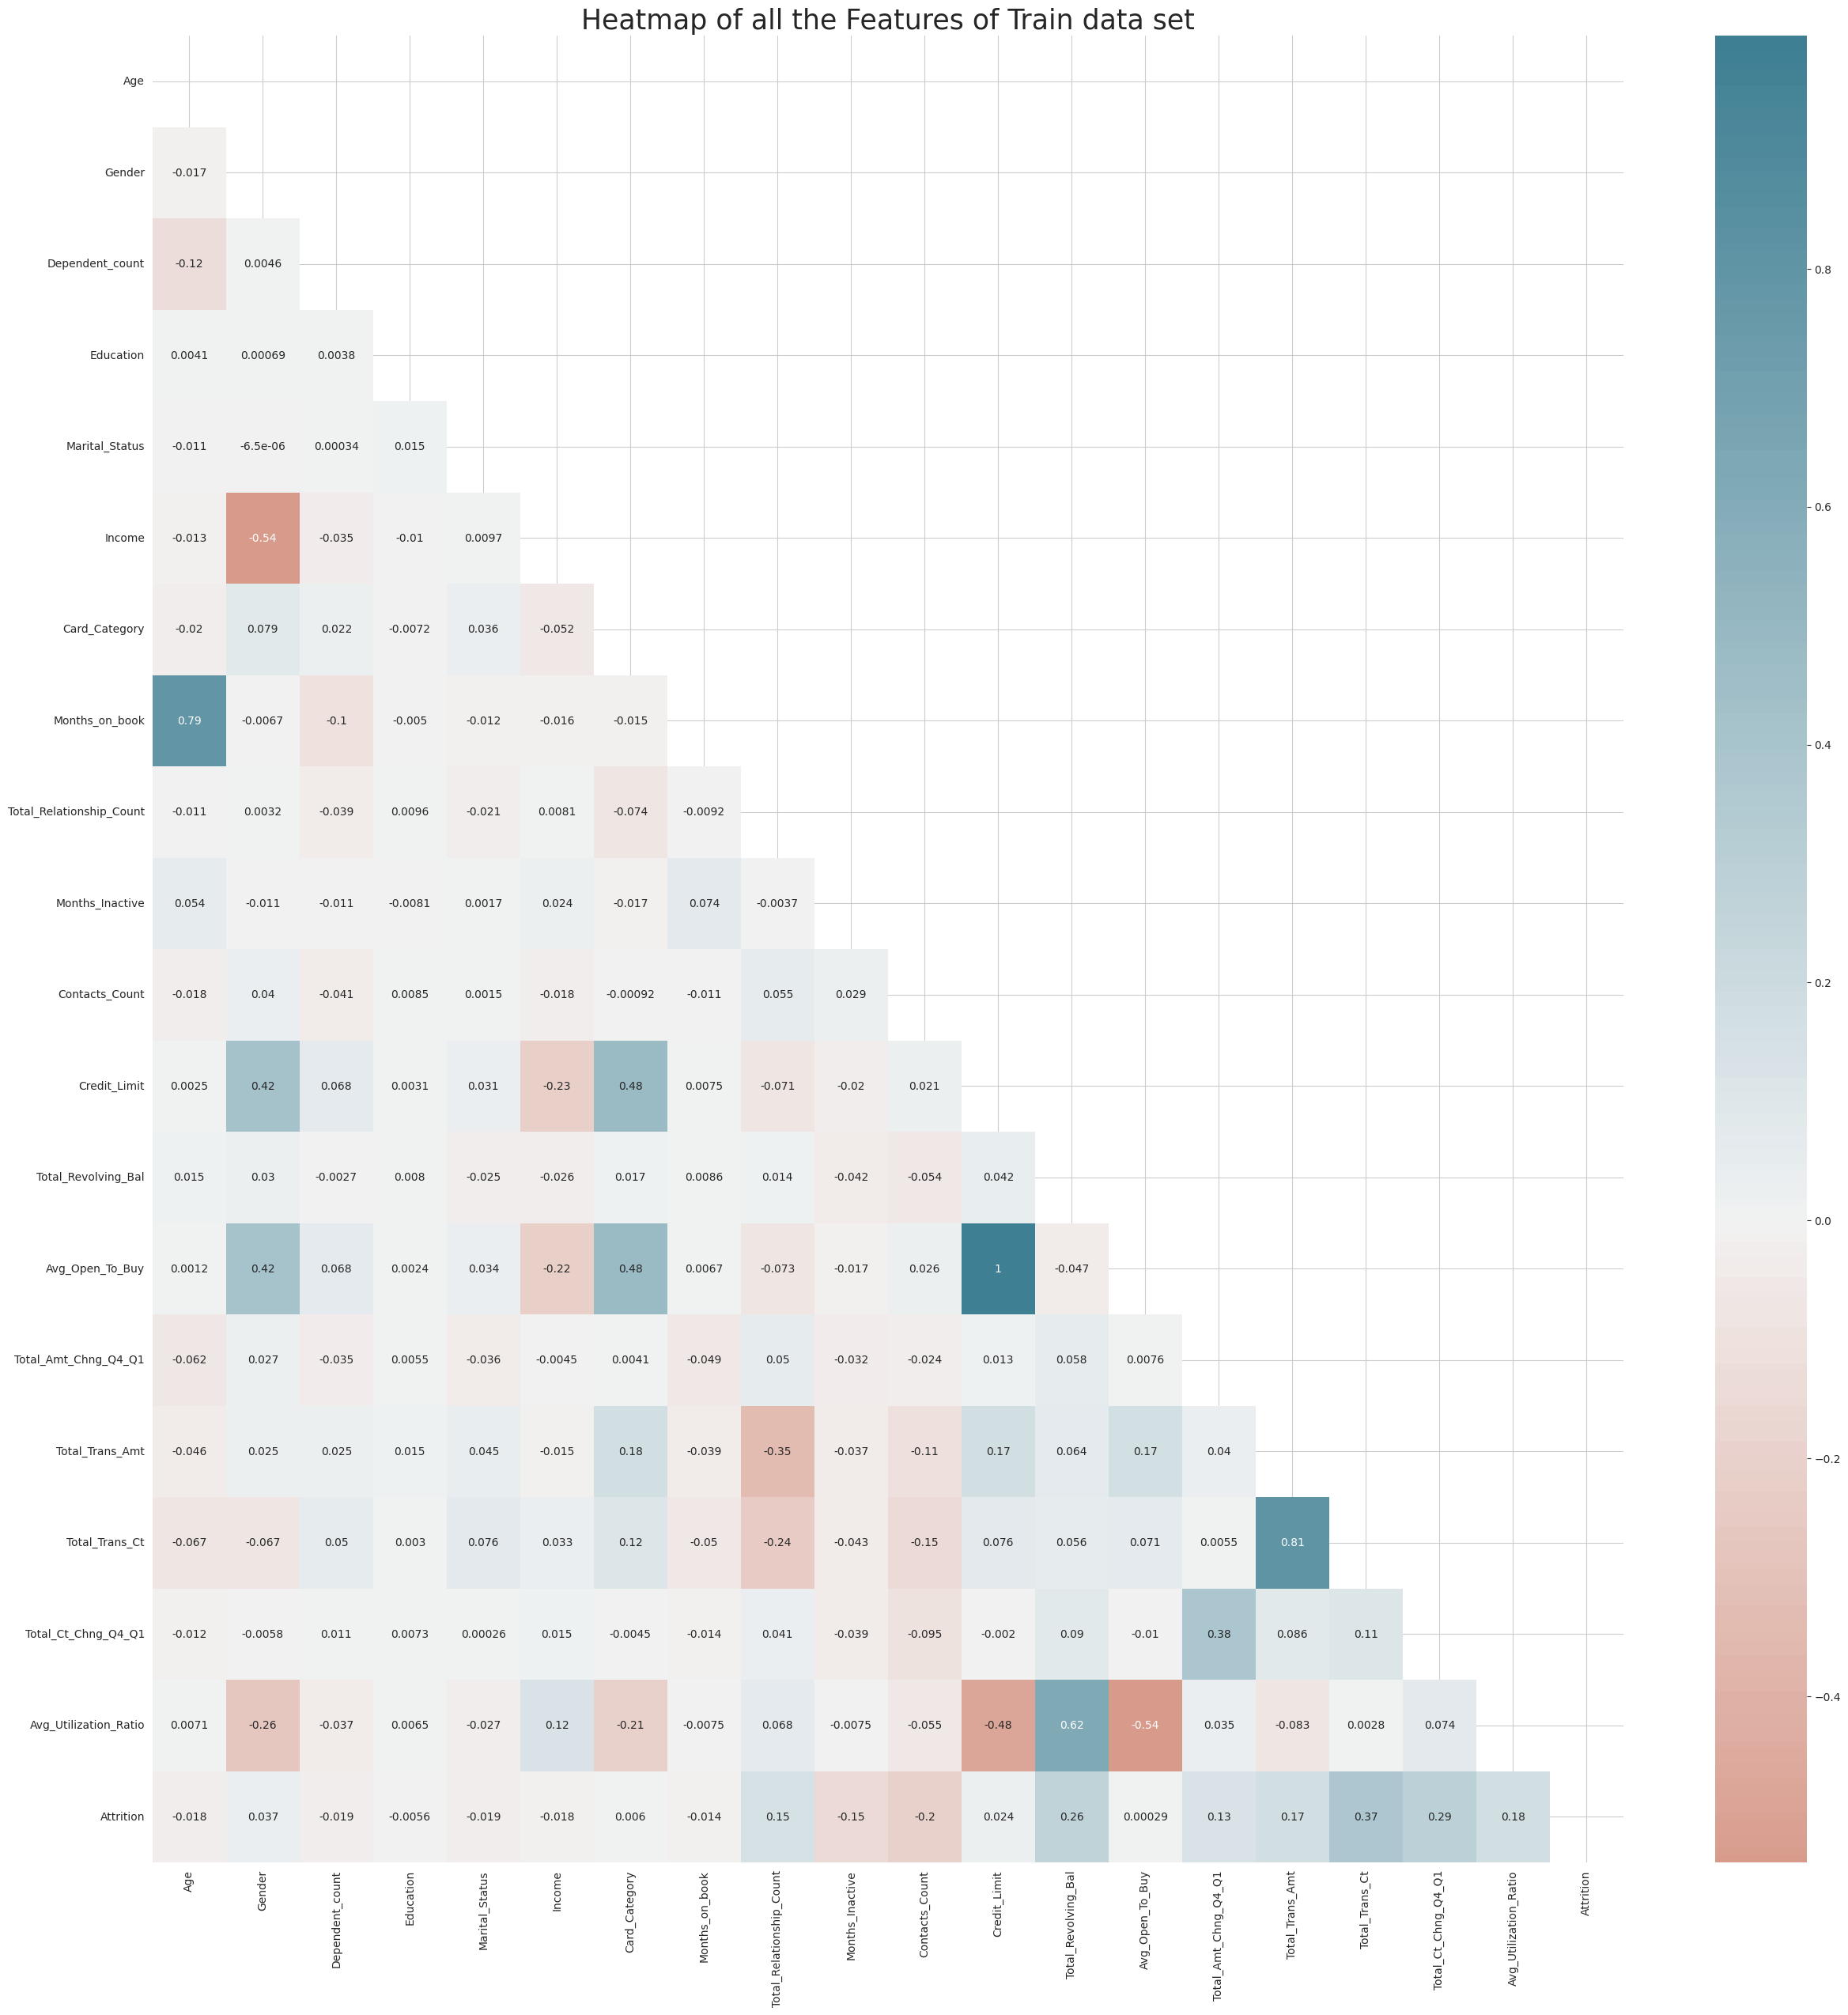

In [ ]:
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (30,30))
## Plotting heatmap. Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df_train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_train.corr(), cmap=sns.diverging_palette(20, 220, n=200), annot=True, mask=mask, center = 0, );
plt.title("Heatmap of all the Features of Train data set", fontsize = 25);

In [ ]:
features = ['Age', 'Gender', 'Dependent_count', 'Education','Marital_Status', 'Income', 'Card_Category','Months_on_book',
            'Total_Relationship_Count','Months_Inactive','Contacts_Count', 'Credit_Limit', 'Total_Revolving_Bal','Total_Amt_Chng_Q4_Q1',
            'Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio','Attrition']
df_train = pd.DataFrame(df_train, columns = features)

In [ ]:
df_train.columns

Index(['Age', 'Gender', 'Dependent_count', 'Education', 'Marital_Status',
       'Income', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count',
       'Months_Inactive', 'Contacts_Count', 'Credit_Limit',
       'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Attrition'],
      dtype='object')

**Step 5: Churn Prediction Model**

In this section we present several regression models for the churn prediction, and compare their relative performances in terms of standard metrics such as precision, recall, specificity, and AUC. These performances also allow us to evaluate the effectiveness of the outlier removal, undersampling and ensemble techniques.

Now, import ML Library packages

In [ ]:
from collections import Counter
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier
from numpy import where
from sklearn import metrics
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBClassifier


**A. Sampling**

As observed, the number of churners is usually much smaller than the number of non-churners, leading to an imbalanced training set. This issue was also present in our analysis, we obsed the Churners rate is upto 16%, which might be NOT MUCH imbalanced. In particular, the most effective method was undersampling, which outperformed the sampling techniques that replicates the rare class, since the latter ones resulted in over-fitting the rare class, thus degrading the model performance significantly. In particular, the undersampling technique significantly improved the results only if combined with the outlier removal. The best proportion between classes was chosen so to optimize the classifier performance on the test set.

We define the Data for Input purpose as following:

In [ ]:
def Definedata():
    # define dataset
    X=df_train.drop(columns=['Attrition']).values
    y=df_train['Attrition'].values
    return X, y

In [ ]:
from sklearn.metrics import classification_report
def Models_NO(models, graph):

    model = models
    X, y = Definedata()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 25)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_total = model.predict(X)

    if graph:
        train_matrix = pd.crosstab(y_train, model.predict(X_train), rownames=['Actual'], colnames=['Predicted'])
        test_matrix = pd.crosstab(y_test, model.predict(X_test), rownames=['Actual'], colnames=['Predicted'])
        matrix = pd.crosstab(y, model.predict(X), rownames=['Actual'], colnames=['Predicted'])

        f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True, figsize=(15, 2))

        g1 = sns.heatmap(train_matrix, annot=True, fmt=".1f", cbar=False,annot_kws={"size": 18},ax=ax1)
        g1.set_title("{}/train set".format(model))
        g1.set_ylabel('Total Churn = {}'.format(1- y_train.sum()), fontsize=14, rotation=90)
        g1.set_xlabel('Accuracy for TrainSet: {}'.format(accuracy_score(model.predict(X_train), y_train)))
        g1.set_xticklabels(['Churn','Not Churn'],fontsize=12)

        g2 = sns.heatmap(test_matrix, annot=True, fmt=".1f",cbar=False,annot_kws={"size": 18},ax=ax2)
        g2.set_title("{}/test set".format(model))
        g2.set_ylabel('Total Churn = {}'.format(1- y_test.sum()), fontsize=14, rotation=90)
        g2.set_xlabel('Accuracy for TestSet: {}'.format(accuracy_score(y_pred, y_test)))
        g2.set_xticklabels(['Churn','Not Churn'],fontsize=12)

        g3 = sns.heatmap(matrix, annot=True, fmt=".1f",cbar=False,annot_kws={"size": 18},ax=ax3)
        g3.set_title("{}/total set".format(model))
        g3.set_ylabel('Total Churn = {}'.format(1- y.sum()), fontsize=14, rotation=90)
        g3.set_xlabel('Accuracy for TotalSet: {}'.format(accuracy_score(y_total, y)))
        g3.set_xticklabels(['Churn','Not Churn'],fontsize=12)

        plt.show()
        print ("")
        print ("Classification Report: ")
        print (classification_report(y, y_total))
    else:
        print("\t\tError Table")
        print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, (y_pred)))
        print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, (y_pred) ))
        print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, (y_pred) )))
        print('Accuracy on Traing set   : ', model.score(X_train,y_train))
        print('Accuracy on Testing set  : ', model.score(X_test,y_test))
        print('AUC score                :', roc_auc_score(y, y_total)*100,'%')
    return y_total, y

**B. Machine Learning Algorithm Training**

Now, we'll use a machine learning algorithm that will identify patterns or trends in the training data. This step is known as algorithm training. We'll feed the features and correct output to the algorithm; based on that data, the algorithm will learn to find associations between the features and outputs. After training the algorithm, you'll be able to use it to make predictions on new data.

There are several machine learning algorithms that can be used to make such predictions. In this work, we'll try some ALGORITHMS to select one of the most powerful algorithms for classification problems.

To train this algorithm, we call the fit method and pass in the feature set (X) and the corresponding label set (y). You can then use the predict method to make predictions on the test set

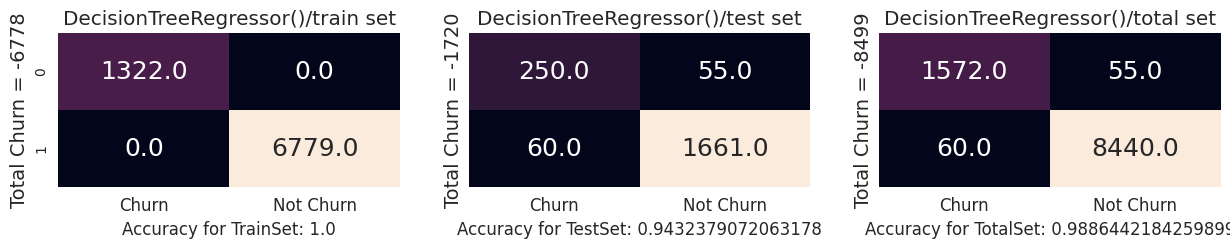


Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1627
           1       0.99      0.99      0.99      8500

    accuracy                           0.99     10127
   macro avg       0.98      0.98      0.98     10127
weighted avg       0.99      0.99      0.99     10127



In [ ]:
y_predict, y_test = Models_NO(DecisionTreeRegressor(), True)

		Error Table
Mean Absolute Error      :  0.05330700888450148
Mean Squared  Error      :  0.05330700888450148
Root Mean Squared  Error :  0.23088310653770552
Accuracy on Traing set   :  1.0
Accuracy on Testing set  :  0.5831474266772083
AUC score                : 97.94830977258758 %


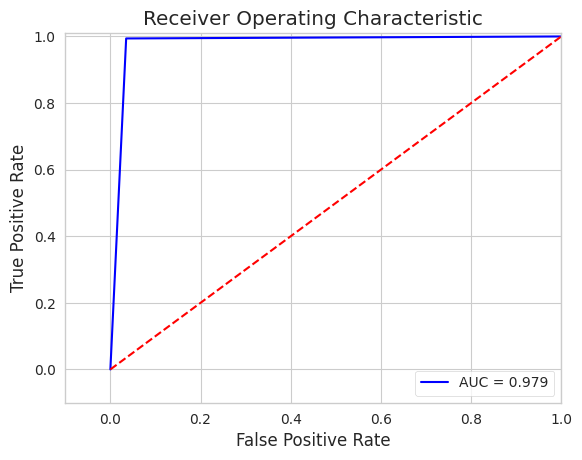

In [ ]:
from sklearn.metrics import confusion_matrix,auc,roc_curve

y_predicted, y_actual = Models_NO(DecisionTreeRegressor(), False)
fpr, tpr, thresholds = roc_curve(y_actual, y_predicted)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**C. SMOTE sampling**

In [ ]:
def SMOTE():
    from collections import Counter
    from sklearn.model_selection import train_test_split
    from imblearn.over_sampling import SMOTE
    from matplotlib import pyplot
    from numpy import where

    X, y = Definedata()

    # summarize class distribution
    counter = Counter(y)
    print(counter)

    # transform the dataset
    smt = SMOTE(random_state=0)
    X, y = smt.fit_resample(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

    # summarize the new class distribution
    counter = Counter(y)
    print(counter)

    # scatter plot of examples by class label
    for label, _ in counter.items():
        row_ix = where(y == label)[0]
        pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
    pyplot.legend()
    pyplot.show()
    return X_train, X_test, y_train, y_test

def ADASYN():
    from collections import Counter
    from sklearn.model_selection import train_test_split
    from imblearn.over_sampling import ADASYN
    from matplotlib import pyplot
    from numpy import where

    X, y = Definedata()

    # summarize class distribution
    counter = Counter(y)
    print(counter)

    # transform the dataset
    X, y = ADASYN().fit_resample(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

    # summarize the new class distribution
    counter = Counter(y)
    print(counter)

    # scatter plot of examples by class label
    for label, _ in counter.items():
        row_ix = where(y == label)[0]
        pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
    pyplot.legend()
    pyplot.show()
    return X_train, X_test, y_train, y_test


Counter({1: 8500, 0: 1627})
Counter({1: 8500, 0: 8500})


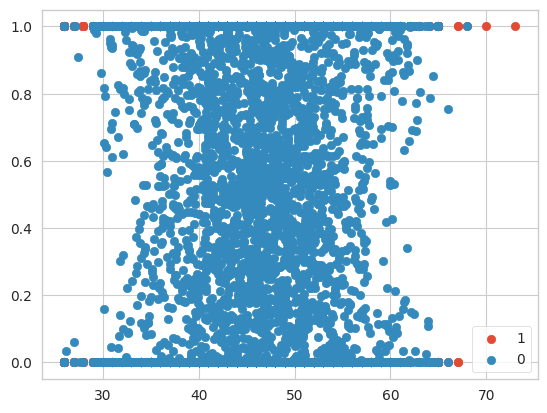

CPU times: user 631 ms, sys: 104 ms, total: 735 ms
Wall time: 602 ms
Counter({1: 8500, 0: 1627})
Counter({0: 8771, 1: 8500})


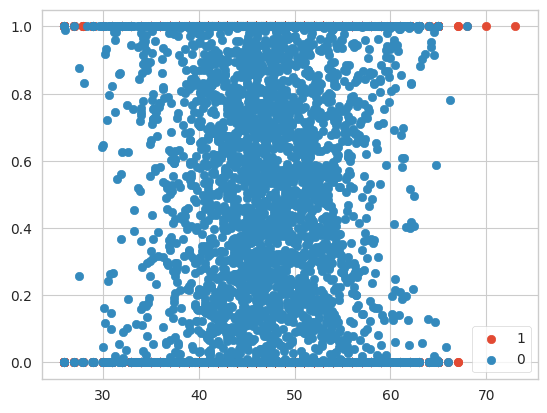

CPU times: user 786 ms, sys: 104 ms, total: 890 ms
Wall time: 692 ms


In [ ]:
%time X_train1, X_test1, y_train1, y_test1 = SMOTE()
%time X_train4, X_test4, y_train4, y_test4 = ADASYN()

In [ ]:
def Models(models, X_train, X_test, y_train, y_test, title, graph):
    model = models
    model.fit(X_train,y_train)

    X, y = Definedata()
    train_matrix = pd.crosstab(y_train, model.predict(X_train), rownames=['Actual'], colnames=['Predicted'])
    test_matrix = pd.crosstab(y_test, model.predict(X_test), rownames=['Actual'], colnames=['Predicted'])
    matrix = pd.crosstab(y, model.predict(X), rownames=['Actual'], colnames=['Predicted'])

    if graph:
        f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True, figsize=(15, 2))

        g1 = sns.heatmap(train_matrix, annot=True, fmt=".1f", cbar=False,annot_kws={"size": 18},ax=ax1)
        g1.set_title(title)
        g1.set_ylabel('Total Churn = {}'.format(y_train.sum()), fontsize=14, rotation=90)
        g1.set_xlabel('Accuracy score (TrainSet): {}'.format(accuracy_score(model.predict(X_train), y_train)))
        g1.set_xticklabels(['Churn','Not Churn'],fontsize=12)

        g2 = sns.heatmap(test_matrix, annot=True, fmt=".1f",cbar=False,annot_kws={"size": 18},ax=ax2)
        g2.set_title(title)
        g2.set_ylabel('Total Churn = {}'.format(y_test.sum()), fontsize=14, rotation=90)
        g2.set_xlabel('Accuracy score (TestSet): {}'.format(accuracy_score(model.predict(X_test), y_test)))
        g2.set_xticklabels(['Churn','Not Churn'],fontsize=12)

        g3 = sns.heatmap(matrix, annot=True, fmt=".1f",cbar=False,annot_kws={"size": 18},ax=ax3)
        g3.set_title(title)
        g3.set_ylabel('Total Churn = {}'.format(y.sum()), fontsize=14, rotation=90)
        g3.set_xlabel('Accuracy score (Total): {}'.format(accuracy_score(model.predict(X), y)))
        g3.set_xticklabels(['Churn','Not Churn'],fontsize=12)

        plt.show()

    print("\t\tError Table")
    print('Accuracy on Training set   : ', model.score(X_train,y_train))
    print('Accuracy on Testing set  : ', model.score(X_test,y_test))
    print('Overall Accuracy_Score   :',accuracy_score(y, model.predict(X))*100,'%')
    print('Recall ratio             :',metrics.recall_score(y, model.predict(X))*100,'%')
    print('AUC score                :', roc_auc_score(y, model.predict(X))*100,'%')

    return y, model.predict(X)

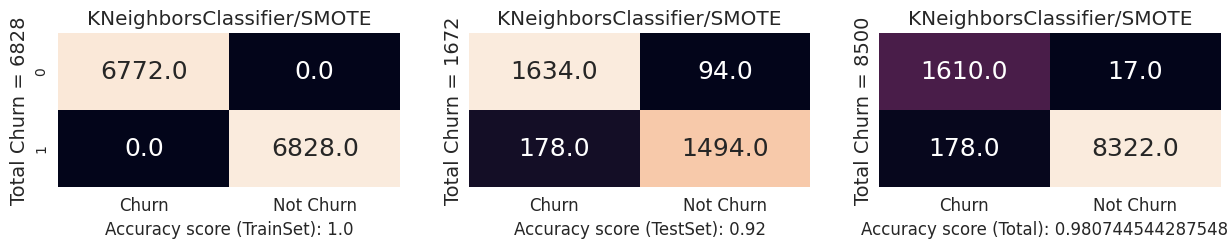

		Error Table
Accuracy on Training set   :  1.0
Accuracy on Testing set  :  0.92
Overall Accuracy_Score   : 98.0744544287548 %
Recall ratio             : 97.90588235294118 %
AUC score                : 98.43050724899672 %
CPU times: user 19.5 s, sys: 534 ms, total: 20 s
Wall time: 14.5 s


In [ ]:
title = 'KNeighborsClassifier/SMOTE'
%time y_actual,y_predicted = Models(KNeighborsClassifier(n_neighbors=1),X_train1, X_test1, y_train1, y_test1, title, True)

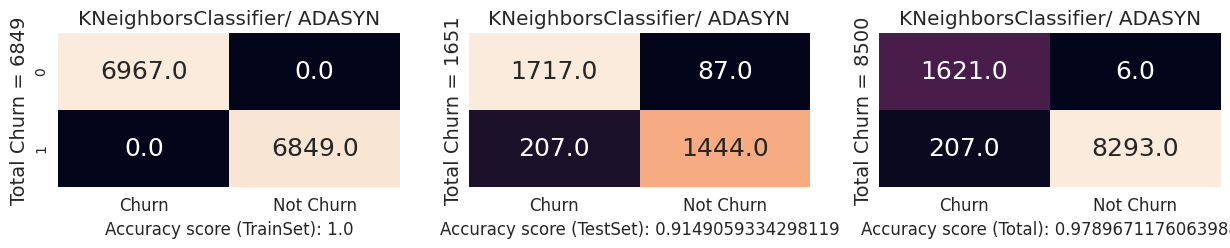

		Error Table
Accuracy on Training set   :  1.0
Accuracy on Testing set  :  0.9149059334298119
Overall Accuracy_Score   : 97.89671176063987 %
Recall ratio             : 97.56470588235294 %
AUC score                : 98.5979644961857 %
CPU times: user 19.8 s, sys: 391 ms, total: 20.2 s
Wall time: 14.8 s


(array([1, 1, 1, ..., 0, 0, 0]), array([1, 0, 1, ..., 0, 0, 0]))

In [ ]:
title = 'KNeighborsClassifier/ ADASYN'
%time Models(KNeighborsClassifier(n_neighbors=1),X_train4, X_test4, y_train4, y_test4, title, True)

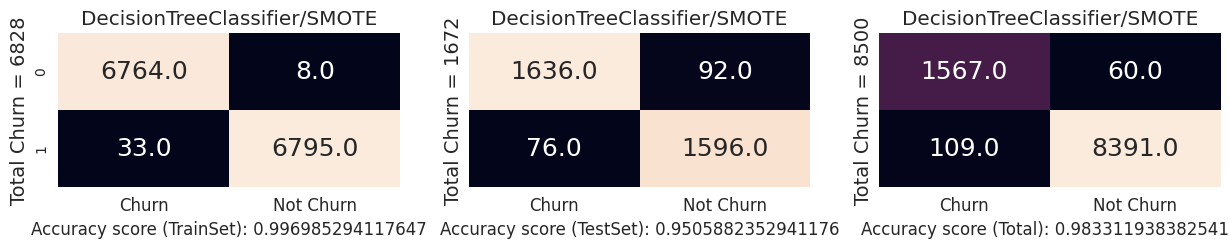

		Error Table
Accuracy on Traing set   :  0.996985294117647
Accuracy on Testing set  :  0.9505882352941176
Overall Accuracy_Score   : 98.33119383825417 %
Recall ratio             : 98.71764705882353 %
AUC score                : 97.51493907950396 %
CPU times: user 1.21 s, sys: 60.4 ms, total: 1.27 s
Wall time: 1.37 s


In [ ]:
title = 'DecisionTreeClassifier/SMOTE'
%time y_actual,y_predicted = Models(DecisionTreeClassifier(max_depth=14),X_train1, X_test1, y_train1, y_test1, title, True)

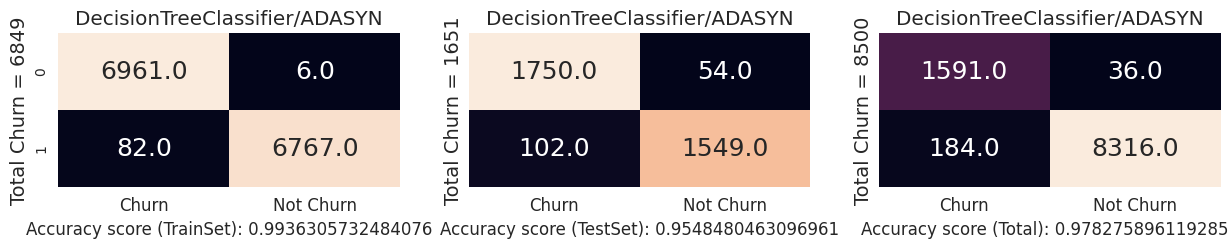

		Error Table
Accuracy on Traing set   :  0.9936305732484076
Accuracy on Testing set  :  0.9548480463096961
Overall Accuracy_Score   : 97.82758961192852 %
Recall ratio             : 97.83529411764705 %
AUC score                : 97.81131638887885 %
CPU times: user 1.25 s, sys: 55.5 ms, total: 1.3 s
Wall time: 1.41 s


(array([1, 1, 1, ..., 0, 0, 0]), array([1, 1, 1, ..., 0, 0, 0]))

In [ ]:
title = 'DecisionTreeClassifier/ADASYN'
%time Models(DecisionTreeClassifier(max_depth=14),X_train4, X_test4, y_train4, y_test4, title, True)

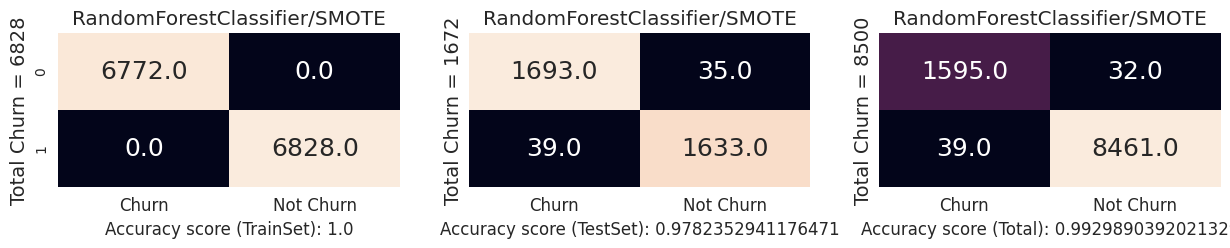

		Error Table
Accuracy on Traing set   :  1.0
Accuracy on Testing set  :  0.9782352941176471
Overall Accuracy_Score   : 99.29890392021329 %
Recall ratio             : 99.54117647058823 %
AUC score                : 98.7871831953433 %
CPU times: user 6.54 s, sys: 57.6 ms, total: 6.59 s
Wall time: 7.23 s


(array([1, 1, 1, ..., 0, 0, 0]), array([1, 1, 1, ..., 0, 0, 0]))

In [ ]:
title = 'RandomForestClassifier/SMOTE'
%time Models(RandomForestClassifier(),X_train1, X_test1, y_train1, y_test1, title, True)

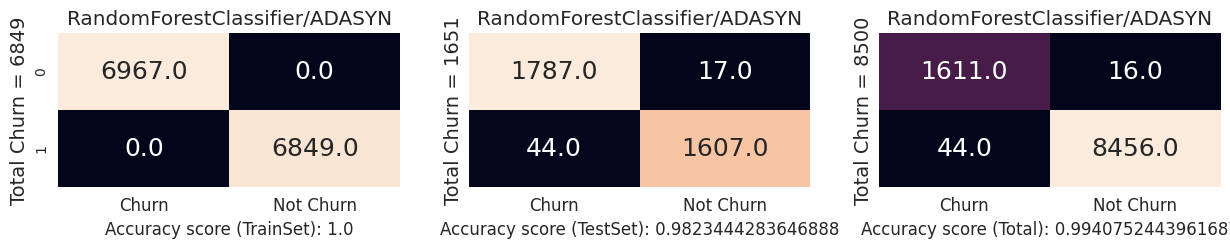

		Error Table
Accuracy on Traing set   :  1.0
Accuracy on Testing set  :  0.9823444283646888
Overall Accuracy_Score   : 99.40752443961686 %
Recall ratio             : 99.48235294117647 %
AUC score                : 99.24947395061282 %
CPU times: user 6.67 s, sys: 116 ms, total: 6.79 s
Wall time: 6.85 s


In [ ]:
title = 'RandomForestClassifier/ADASYN'
%time y_actual,y_predicted = Models(RandomForestClassifier(),X_train4, X_test4, y_train4, y_test4, title, True)

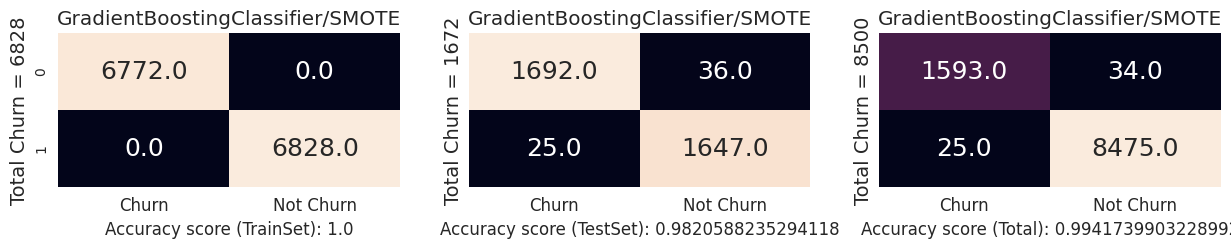

		Error Table
Accuracy on Traing set   :  1.0
Accuracy on Testing set  :  0.9820588235294118
Overall Accuracy_Score   : 99.41739903228992 %
Recall ratio             : 99.70588235294117 %
AUC score                : 98.80807332152283 %
CPU times: user 38.5 s, sys: 128 ms, total: 38.6 s
Wall time: 38.7 s


(array([1, 1, 1, ..., 0, 0, 0]), array([1, 1, 1, ..., 0, 0, 0]))

In [ ]:
title = 'GradientBoostingClassifier/SMOTE'
%time Models(GradientBoostingClassifier(n_estimators=1500, learning_rate=1, max_features=10, max_depth=2, random_state=0),X_train1, X_test1, y_train1, y_test1, title, True)

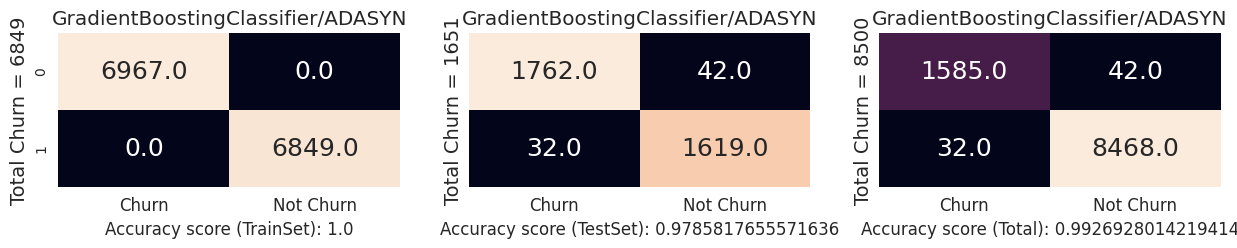

		Error Table
Accuracy on Traing set   :  1.0
Accuracy on Testing set  :  0.9785817655571636
Overall Accuracy_Score   : 99.26928014219413 %
Recall ratio             : 99.62352941176471 %
AUC score                : 98.5210455909469 %
CPU times: user 5.71 s, sys: 120 ms, total: 5.83 s
Wall time: 6.88 s


(array([1, 1, 1, ..., 0, 0, 0]), array([1, 1, 1, ..., 0, 0, 0]))

In [ ]:
title = 'GradientBoostingClassifier/ADASYN'
%time Models(GradientBoostingClassifier(n_estimators=500, learning_rate=1, max_features=2, max_depth=2, random_state=0),X_train4, X_test4, y_train4, y_test4, title, True)

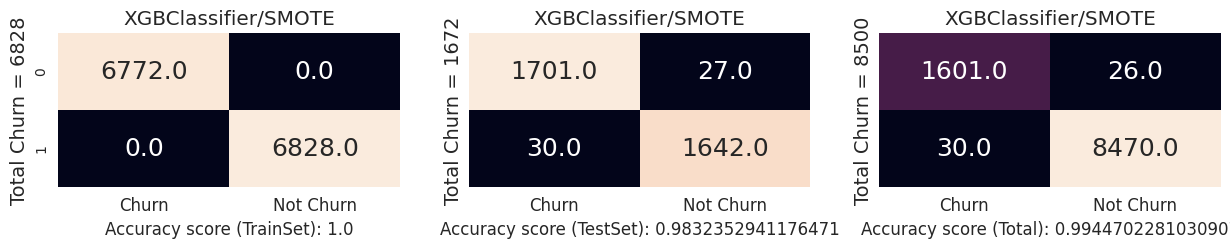

		Error Table
Accuracy on Traing set   :  1.0
Accuracy on Testing set  :  0.9832352941176471
Overall Accuracy_Score   : 99.44702281030906 %
Recall ratio             : 99.6470588235294 %
AUC score                : 99.02451281680467 %
CPU times: user 6.08 s, sys: 78.4 ms, total: 6.16 s
Wall time: 7.02 s


(array([1, 1, 1, ..., 0, 0, 0]), array([1, 1, 1, ..., 0, 0, 0]))

In [ ]:
title = 'XGBClassifier/SMOTE'
%time Models(XGBClassifier(colsample_bytree=0.9, learning_rate=0.2, max_depth=7),X_train1, X_test1, y_train1, y_test1, title, True)

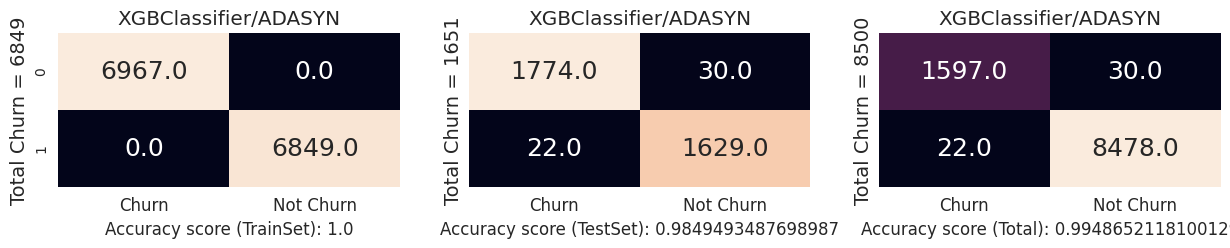

		Error Table
Accuracy on Traing set   :  1.0
Accuracy on Testing set  :  0.9849493487698987
Overall Accuracy_Score   : 99.48652118100128 %
Recall ratio             : 99.74117647058823 %
AUC score                : 98.94864601034021 %
CPU times: user 3.49 s, sys: 123 ms, total: 3.61 s
Wall time: 3.23 s


(array([1, 1, 1, ..., 0, 0, 0]), array([1, 1, 1, ..., 0, 0, 0]))

In [ ]:
title = 'XGBClassifier/ADASYN'
%time Models(XGBClassifier(colsample_bytree=0.9, learning_rate=0.2, max_depth=7),X_train4, X_test4, y_train4, y_test4, title, True)

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 6828, number of negative: 6772
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010767 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4590
[LightGBM] [Info] Number of data points in the train set: 13600, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502059 -> initscore=0.008235
[LightGBM] [Info] Start training from score 0.008235
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

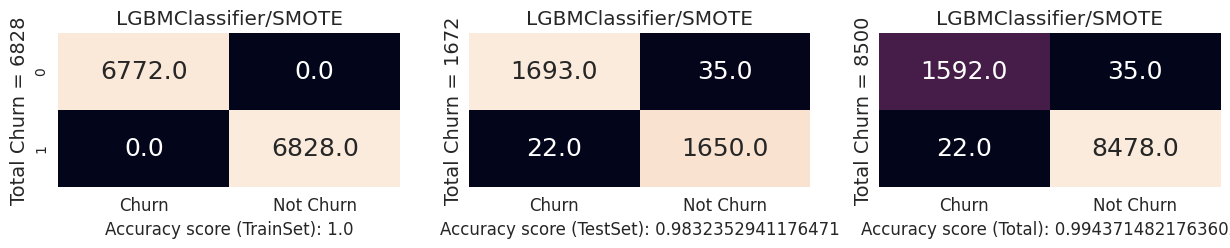

		Error Table
[LightGBM] [Warning] Unknown parameter: silent
Accuracy on Traing set   :  1.0
[LightGBM] [Warning] Unknown parameter: silent
Accuracy on Testing set  :  0.9832352941176471
[LightGBM] [Warning] Unknown parameter: silent
Overall Accuracy_Score   : 99.43714821763602 %
[LightGBM] [Warning] Unknown parameter: silent
Recall ratio             : 99.74117647058823 %
[LightGBM] [Warning] Unknown parameter: silent
AUC score                : 98.7949889728479 %
[LightGBM] [Warning] Unknown parameter: silent
CPU times: user 24.5 s, sys: 2.61 s, total: 27.1 s
Wall time: 19 s


(array([1, 1, 1, ..., 0, 0, 0]), array([1, 1, 1, ..., 0, 0, 0]))

In [ ]:
title = 'LGBMClassifier/SMOTE'
%time Models(LGBMClassifier(max_depth=-1, random_state=20, silent=True, metric='None', n_jobs=5, n_estimators=1000),X_train1, X_test1, y_train1, y_test1, title, True)

[LightGBM] [Info] Number of positive: 6849, number of negative: 6967
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004788 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4590
[LightGBM] [Info] Number of data points in the train set: 13816, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495730 -> initscore=-0.017082
[LightGBM] [Info] Start training from score -0.017082


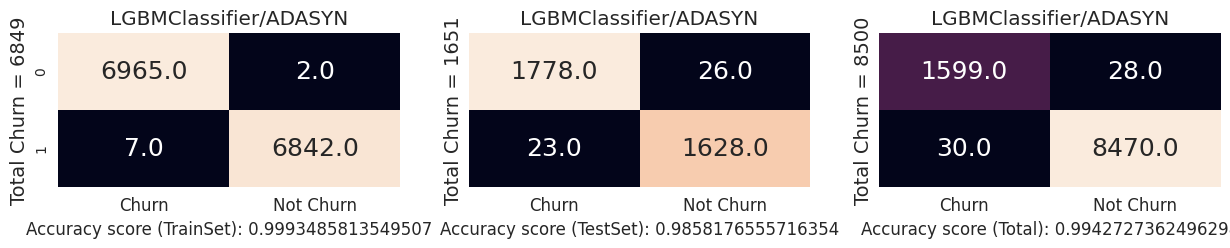

		Error Table
Accuracy on Traing set   :  0.9993485813549507
Accuracy on Testing set  :  0.9858176555716354
Overall Accuracy_Score   : 99.42727362496298 %
Recall ratio             : 99.6470588235294 %
AUC score                : 98.96305000180774 %
CPU times: user 2.93 s, sys: 65.5 ms, total: 3 s
Wall time: 3.8 s


(array([1, 1, 1, ..., 0, 0, 0]), array([1, 1, 1, ..., 0, 0, 0]))

In [ ]:
title = 'LGBMClassifier/ADASYN'
%time Models(LGBMClassifier(),X_train4, X_test4, y_train4, y_test4, title, True)

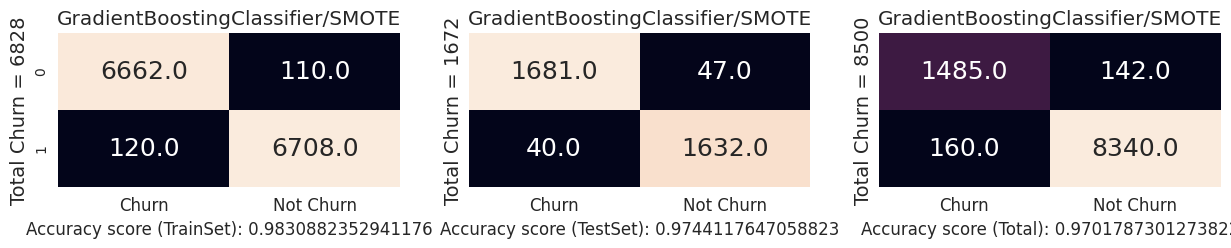

		Error Table
Accuracy on Traing set   :  0.9830882352941176
Accuracy on Testing set  :  0.9744117647058823
Overall Accuracy_Score   : 97.01787301273822 %
Recall ratio             : 98.11764705882354 %
AUC score                : 94.69496366462997 %
CPU times: user 8.16 s, sys: 129 ms, total: 8.28 s
Wall time: 11 s


(array([1, 1, 1, ..., 0, 0, 0]), array([1, 1, 1, ..., 0, 0, 0]))

In [ ]:
title = 'GradientBoostingClassifier/SMOTE'
%time Models(GradientBoostingClassifier(),X_train1, X_test1, y_train1, y_test1, title, True)

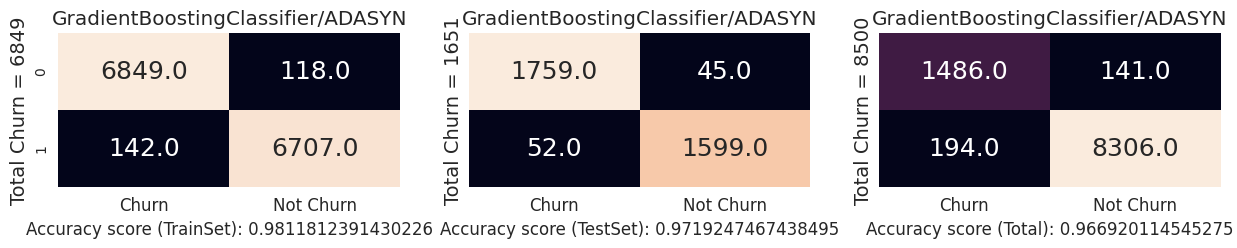

		Error Table
Accuracy on Training set   :  0.9811812391430226
Accuracy on Testing set  :  0.9719247467438495
Overall Accuracy_Score   : 96.6920114545275 %
Recall ratio             : 97.71764705882353 %
AUC score                : 94.52569507212843 %
CPU times: user 7.57 s, sys: 118 ms, total: 7.68 s
Wall time: 7.64 s


(array([1, 1, 1, ..., 0, 0, 0]), array([1, 1, 1, ..., 0, 0, 0]))

In [ ]:
title = 'GradientBoostingClassifier/ADASYN'
%time Models(GradientBoostingClassifier(),X_train4, X_test4, y_train4, y_test4, title, True)

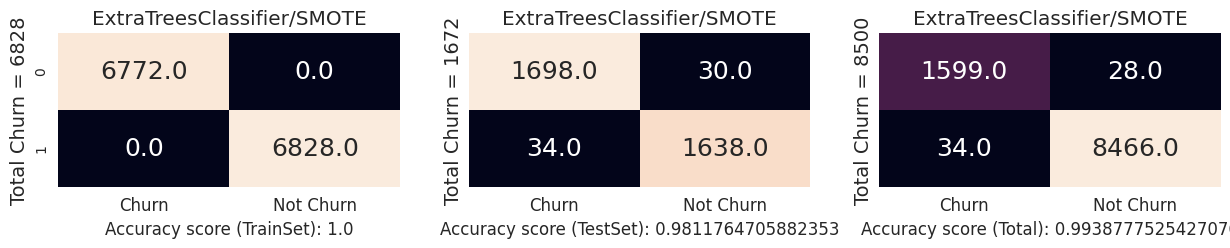

		Error Table
Accuracy on Training set   :  1.0
Accuracy on Testing set  :  0.9811764705882353
Overall Accuracy_Score   : 99.38777525427076 %
Recall ratio             : 99.6 %
AUC score                : 98.93952059004302 %
CPU times: user 3.83 s, sys: 112 ms, total: 3.94 s
Wall time: 3.84 s


(array([1, 1, 1, ..., 0, 0, 0]), array([1, 1, 1, ..., 0, 0, 1]))

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

title = 'ExtraTreesClassifier/SMOTE'
%time Models(ExtraTreesClassifier(), X_train1, X_test1, y_train1, y_test1, title, True)

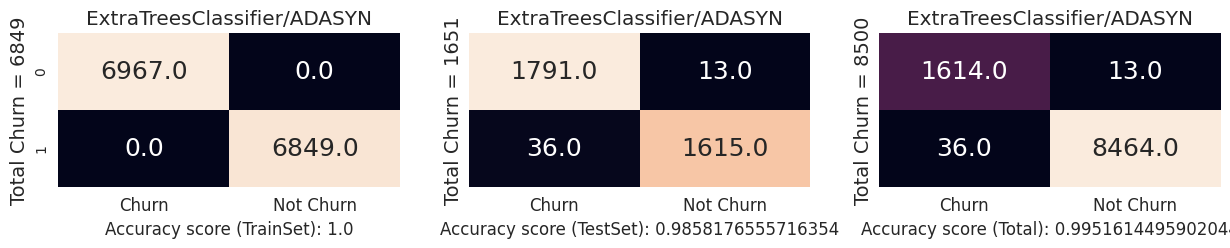

		Error Table
Accuracy on Training set   :  1.0
Accuracy on Testing set  :  0.9858176555716354
Overall Accuracy_Score   : 99.51614495902044 %
Recall ratio             : 99.5764705882353 %
AUC score                : 99.38872699663762 %
CPU times: user 4.16 s, sys: 121 ms, total: 4.29 s
Wall time: 4.24 s


(array([1, 1, 1, ..., 0, 0, 0]), array([1, 1, 1, ..., 0, 0, 0]))

In [ ]:
title = 'ExtraTreesClassifier/ADASYN'
%time Models(ExtraTreesClassifier(),X_train4, X_test4, y_train4, y_test4, title, True)

**For conclusion, ExtraTreesClassifier is the recommended model for this topic.**

Model | Training set | Testing set | Overall |

KNeighborsClassifier: | 100% | 91.1% | 96.3% |

DecisionTreeClassifier: | 99.6% | 95.3% | 97.6% |

RandomForestClassifier: | 100% | 97.9% | 98.9% |

GradientBoostingClassifier: | 100% | 98.4% | 99.1% |

XGBClassifier: | 100% | 98.5% | 99.2% |

LGBMClassifier: | 100% | 98.5% | 99.2% |

GradientBoostingClassifier: | 99.7% | 98.2% | 98.7% |

ExtraTreesClassifier: | 100% | 98.4% | 99.1% | ===> THIS IS THE BEST ONE

		Error Table
Accuracy on Traing set   :  1.0
Accuracy on Testing set  :  0.9788235294117648
Overall Accuracy_Score   : 99.31865310555939 %
Recall ratio             : 99.58823529411764 %
AUC score                : 98.74924979211106 %


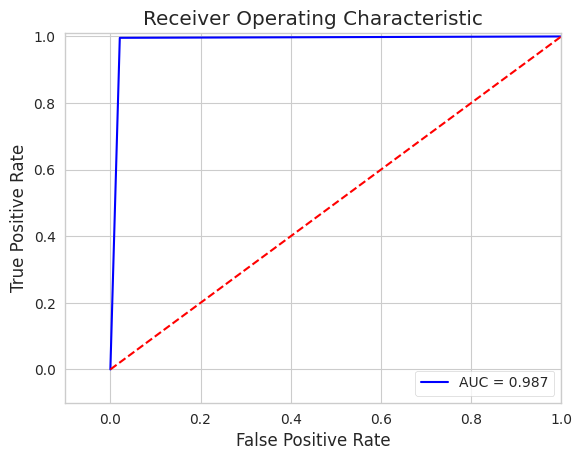

In [ ]:
from sklearn.metrics import confusion_matrix,auc,roc_curve

title = 'RandomForestClassifier using the SMOTE'
y, ypred =  Models(RandomForestClassifier(),X_train1, X_test1, y_train1, y_test1, title, False)

fpr, tpr, thresholds = roc_curve(y, ypred)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

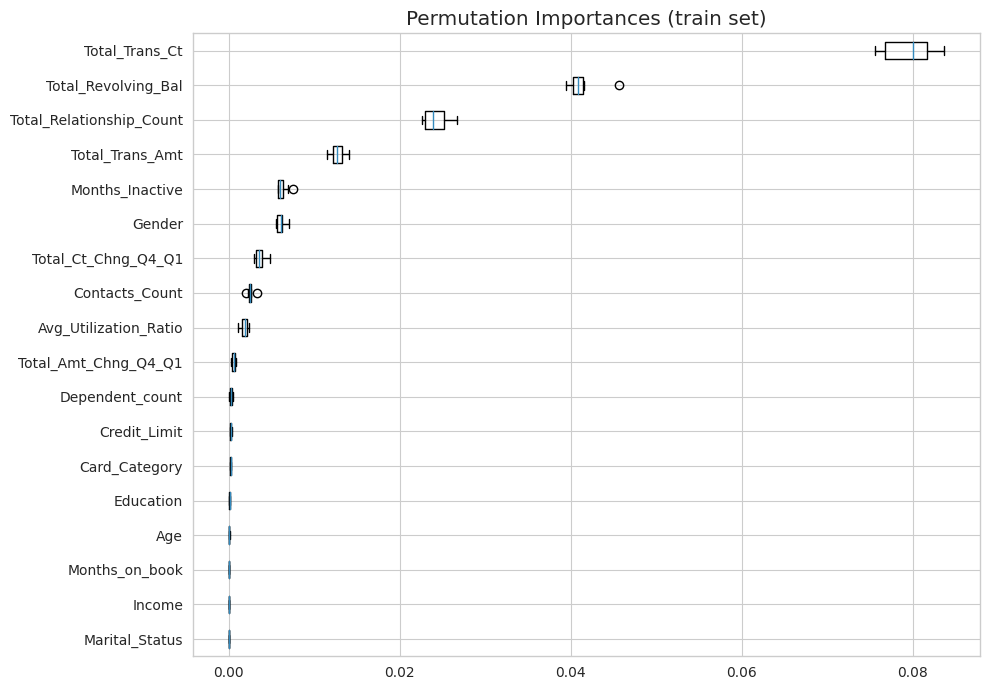

In [ ]:
X=df_train.drop(columns=['Attrition'])
y=df_train['Attrition'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 25)

model = ExtraTreesClassifier()
model.fit(X_train,y_train)
resultmymodel = permutation_importance(model, X_train, y_train, n_repeats=10,random_state=42, n_jobs=2)
sorted_idx = resultmymodel.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(10,7))
ax.boxplot(resultmymodel.importances[sorted_idx].T,vert=False, labels=X_train.columns[sorted_idx])
ax.set_title("Permutation Importances (train set)")
fig.tight_layout()
plt.show()

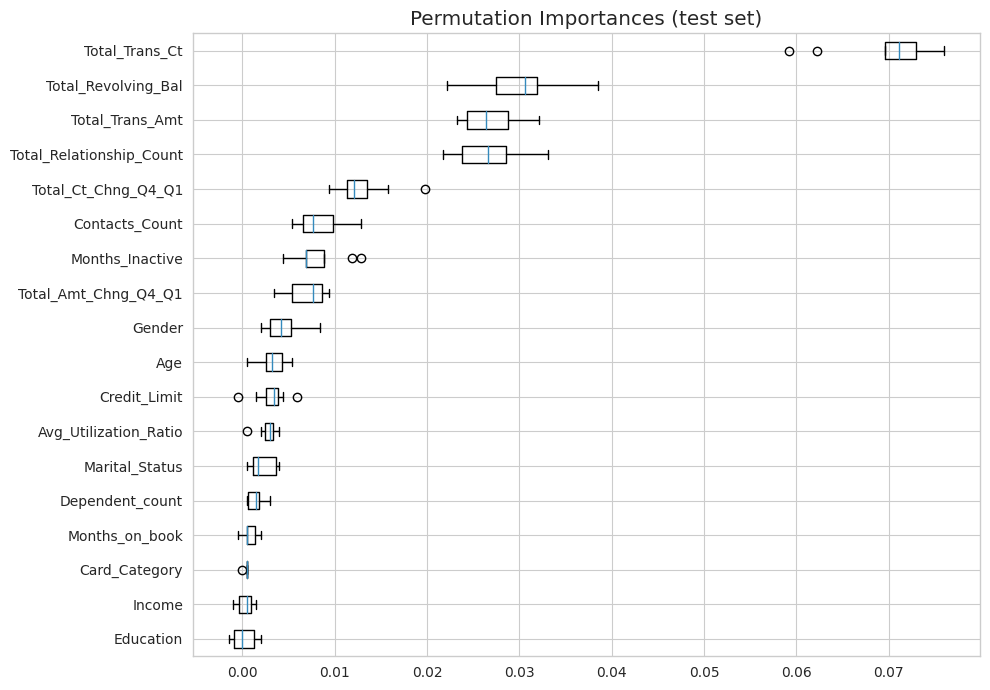

In [ ]:
#X=df_train.drop(columns=['Attrition'])
#y=df_train['Attrition'].values

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 25)

#model = ExtraTreesClassifier()
#model.fit(X_test,y_test)
resultmymodel = permutation_importance(model, X_test, y_test, n_repeats=10,random_state=42, n_jobs=2)
sorted_idx = resultmymodel.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(10,7))
ax.boxplot(resultmymodel.importances[sorted_idx].T,vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

**Conclusion**

Customer churn prediction is crucial to the long-term financial stability of a company. In this Notebook, we successfully created a machine learning model that's able to predict customer churn with an accuracy higher than 95%.